# Plotting separate PTE terms for all simulations 

Ting-Chen Chen (ting-chen.chen@kit.edu) 

In [1]:
dt = 6
data_res  = '1x1latlon'
if   dt == 1:
     data_dt = '1hrly'
elif dt == 6:
     data_dt = '6hrly'
        
p2level = 50
boxsize =  6

In [2]:
#####################################################
# cyclone specific data
#####################################################
# channel_Xkm_0001: control simulations
# channel_Xkm_0002: +4K, qv consistent with T
# channel_Xkm_0003: +4k, qv from control
# channel_Xkm_0004: +temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0005: +tropical temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0006: +polar temperature anomaly from MPI-ESM1-2-LR far future

# Note that the  2-km experiments contain outputs every 6 hrs
# Note that the 80-km experiments contain outputs every 1 hrs


expname = {
      1: 'CTL',    
      2: 'T+4K',
      3: 'T+4K_RH-',
      4: 'T+anom',
      5: 'T+TRanom',
      6: 'T+POanom'
         }

exp80 = { 
      1:'channel_80km_0001',
      2:'channel_80km_0002',
      3:'channel_80km_0003',
      4:'channel_80km_0004',
      5:'channel_80km_0005',
      6:'channel_80km_0006',
      }

exp2 = { 
      1:'channel_2km_0001',
      2:'channel_2km_0002',
      3:'channel_2km_0003',
      4:'channel_2km_0004',
      5:'channel_2km_0005',
      6:'channel_2km_0006',
      }


In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import psutil
import datetime
import time as tm
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.filterwarnings("ignore")

In [4]:
res='2km'
#####################################################
# Read in PTE track data from file
#####################################################
#Cyclone Track
path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_PTE_timeseries/'
dur = {}
dp = {}
dfi = {}
ep = {}
itt = {}
eq1res = {}
tadv = {}
vmt = {}
diab = {}
eq2res = {}
diabptend = {}
for i in range(1,7):
    #print(exp80[i])
    if res == '80km':
        exp=exp80
    else:
        exp=exp2
    ifile    ='PTE_for_'+exp[i]+'_'+data_dt+'_'+data_res+'_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'.csv'
    df_track = pd.read_csv(path_track+ifile)
    #ntrack = len(df_track['lat']) 
    dur[exp[i]] = df_track['time']+1
    #lon  = df_track['lon']
    #lat  = df_track['lat'] 
    dp[exp[i]]        = df_track['dp'] 
    dfi[exp[i]]       = df_track['dfi']                      
    ep[exp[i]]        = df_track['ep']    
    itt[exp[i]]       = df_track['itt'] 
    eq1res[exp[i]]    = df_track['eq1res']                     
    tadv[exp[i]]      = df_track['tadv']
    vmt[exp[i]]       = df_track['vmt']
    diab[exp[i]]      = df_track['diab']
    eq2res[exp[i]]    = df_track['eq2res'] 
    diabptend[exp[i]] = df_track['diabptend'] 

dp[exp[1]]
                       

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7     -1.915702
8     -1.042811
9     -1.995226
10    -2.646620
11    -5.927210
12    -5.195952
13    -5.552240
14   -10.992277
15    -8.752256
16    -1.686867
17    -3.592859
18    -3.534495
19    -7.523863
20    -2.563135
21    -7.825234
22    -4.287594
23     0.642632
24    -7.316768
25    -3.363501
26    -8.588635
27    -2.459488
28     1.893945
29    -2.639051
30     1.993163
31    -1.674762
32    -1.514501
33    -2.166395
34     1.549944
35     1.164142
36     1.756714
Name: dp, dtype: float64

# PLOT the time evolution of the cyclone-associated PTE 

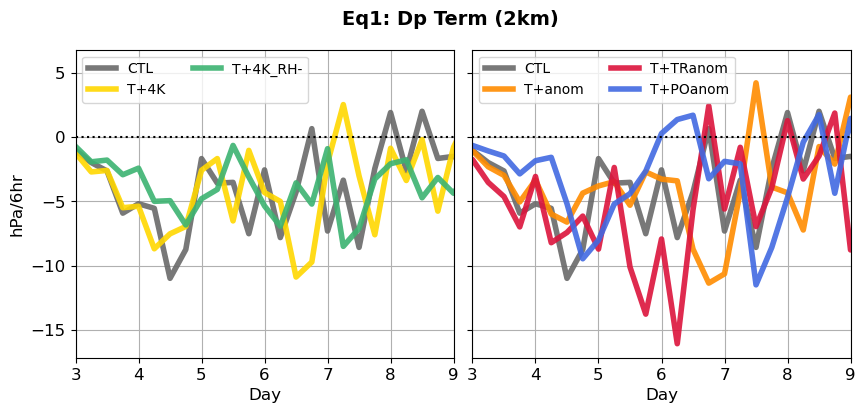

In [5]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'Dp'

fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



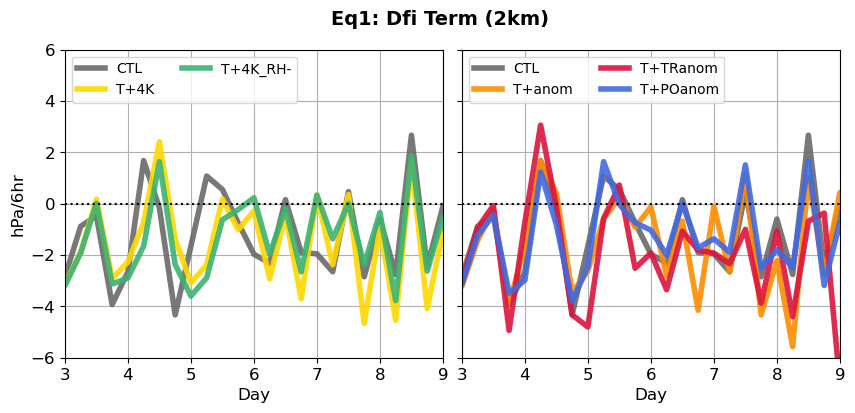

In [6]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'Dfi'

fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim((-6, 6))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim((-6, 6))
#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



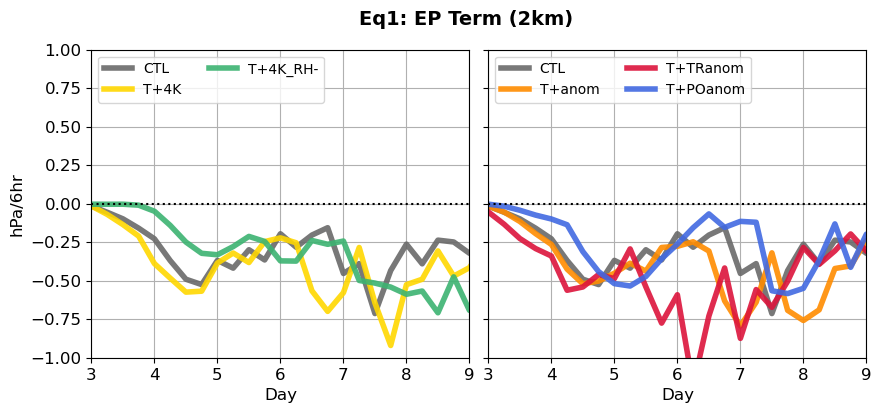

In [7]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'EP'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim((-1, 1))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim((-1, 1))
#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



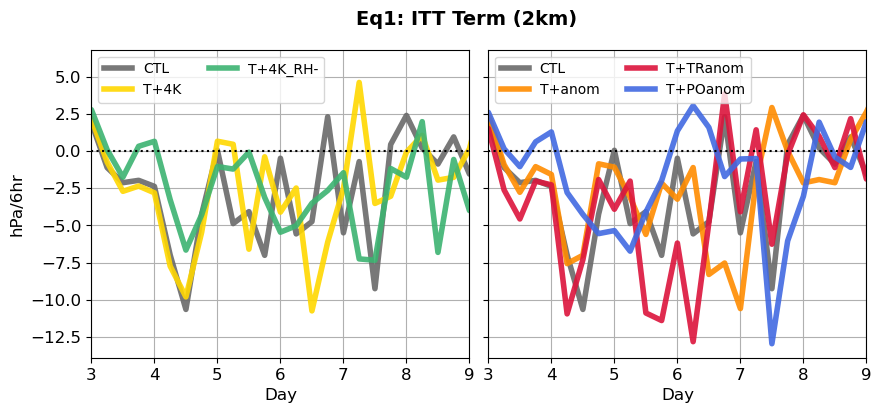

In [8]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'ITT'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



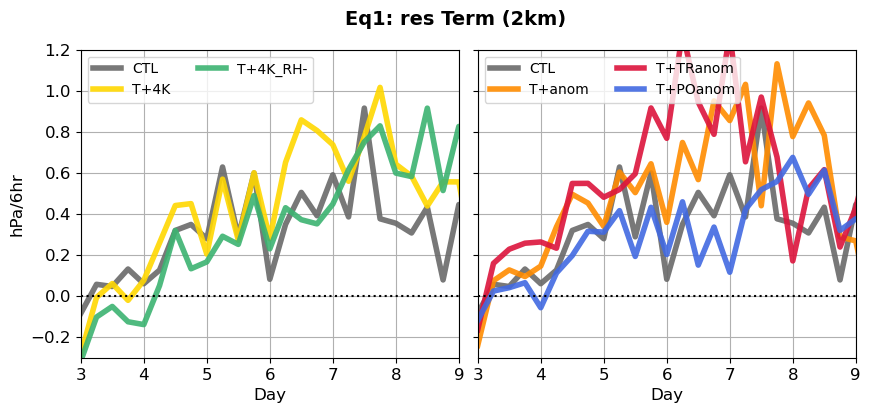

In [9]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'res'

fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp[i]], eq1res[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp[i]], eq1res[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim((-0.3, 1.2))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim((-0.3, 1.2))
#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim_eq1'+res+'_eq1'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



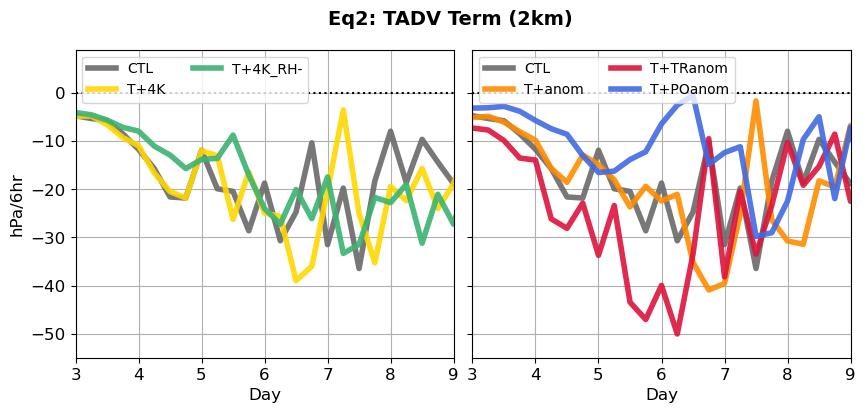

In [10]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'TADV'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-55, 9)
#ax[0].set_ylim((-0.3, 1.2))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-55, 9)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



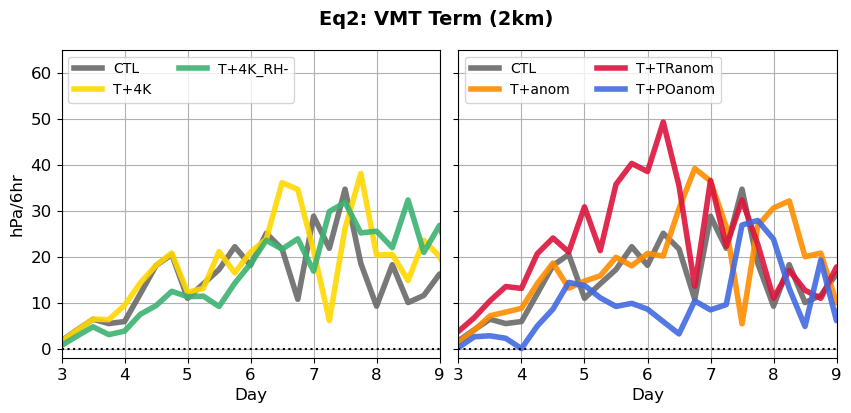

In [11]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'VMT'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-2, 65)
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-2, 65)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



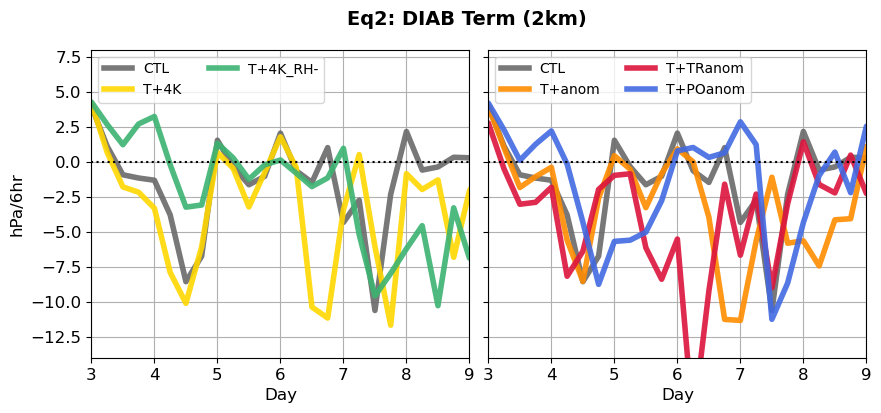

In [12]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'DIAB'

fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-14, 8)
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-14, 8)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



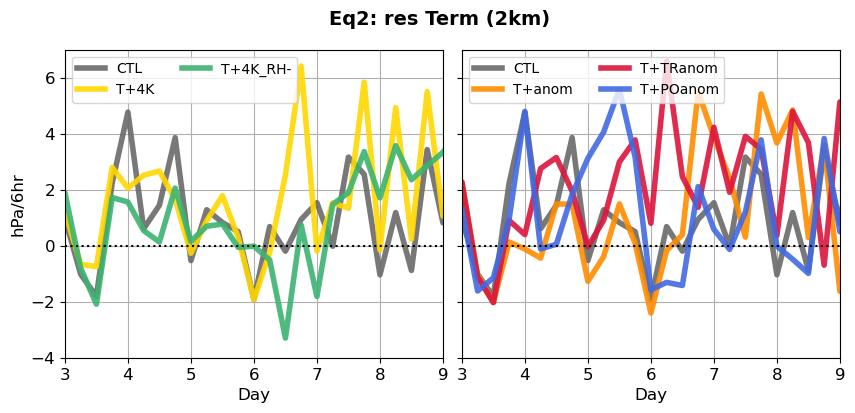

In [13]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'res'

fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-4, 7)
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-4, 7)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_eq2'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



In [14]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'DIABptend'

fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    
    p = diabptend[exp[i]].copy()
    n = diabptend[exp[i]].copy()

    p[diab[exp[i]] >= 0] = np.nan
    n[diab[exp[i]] < 0]  = np.nan
    ax[0].plot(dur[exp[i]], p, color=colors[i],
               linestyle='-',linewidth=4, label=expname[i], alpha=0.9)
    ax[0].plot(dur[exp[i]], n, color=colors[i],
               linestyle=':',linewidth=3, alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    p = diabptend[exp[i]].copy()
    n = diabptend[exp[i]].copy()

    p[diab[exp[i]] >= 0] = np.nan
    n[diab[exp[i]] < 0]  = np.nan
    ax[1].plot(dur[exp[i]],p, color=colors[i],
               linestyle='-',linewidth=4, label=expname[i], alpha=0.9)
    ax[1].plot(dur[exp[i]],n, color=colors[i],
               linestyle=':',linewidth=3, alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-2, 82)
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-2, 82)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



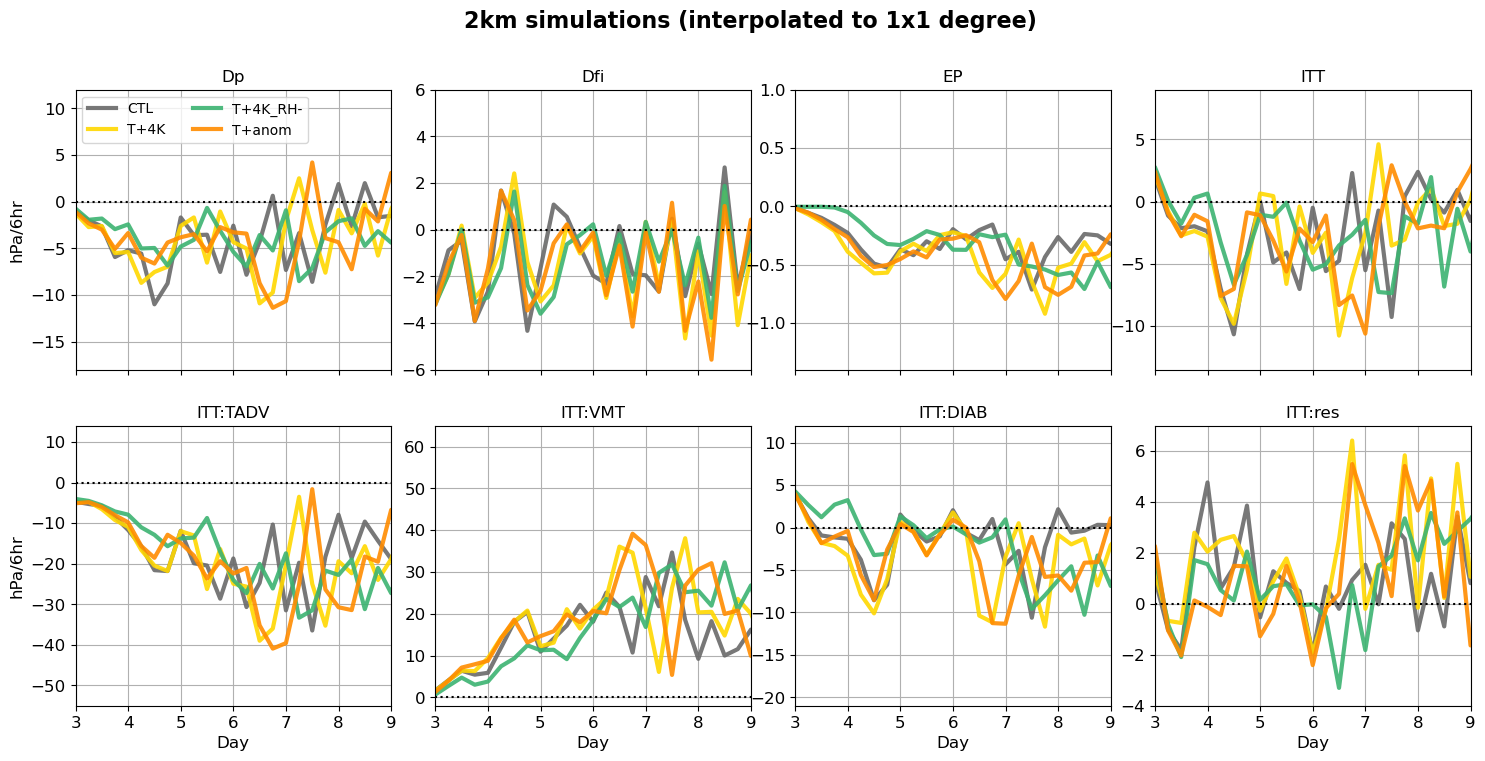

In [15]:
# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'All'

fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax[0,0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,3].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,2].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    
ax[0,0].set_title('Dp')
ax[0,1].set_title('Dfi')
ax[0,2].set_title('EP')
ax[0,3].set_title('ITT')
ax[1,0].set_title('ITT:TADV')
ax[1,1].set_title('ITT:VMT')
ax[1,2].set_title('ITT:DIAB')
ax[1,3].set_title('ITT:res')


ax[0,0].set_ylim((-18, 12))
ax[0,1].set_ylim((-6, 6))
ax[0,2].set_ylim((-1.4, 1))
ax[0,3].set_ylim((-13.5, 9))
ax[1,0].set_ylim(-55, 14)
ax[1,1].set_ylim(-2, 65)
ax[1,2].set_ylim(-21, 12)
ax[1,3].set_ylim(-4, 7)

ax[1,0].set_xlabel('Day', fontsize=12)
ax[1,1].set_xlabel('Day', fontsize=12)
ax[1,2].set_xlabel('Day', fontsize=12)
ax[1,3].set_xlabel('Day', fontsize=12)

ax[0,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0,0].set_xlim((3, 9))
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k')
ax[0,1].axhline(y=0,linestyle=':', color='k')
ax[0,2].axhline(y=0,linestyle=':', color='k')
ax[0,3].axhline(y=0,linestyle=':', color='k')
ax[1,0].axhline(y=0,linestyle=':', color='k')
ax[1,1].axhline(y=0,linestyle=':', color='k')
ax[1,2].axhline(y=0,linestyle=':', color='k')
ax[1,3].axhline(y=0,linestyle=':', color='k')
ax[0,0].legend(ncol=2, loc='upper left')
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.14)
fig.suptitle(''+res+' simulations (interpolated to 1x1 degree)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Sim1234_'+res+'_Allterms_in_onefig.png',
               bbox_inches='tight',dpi=100)
plt.show()



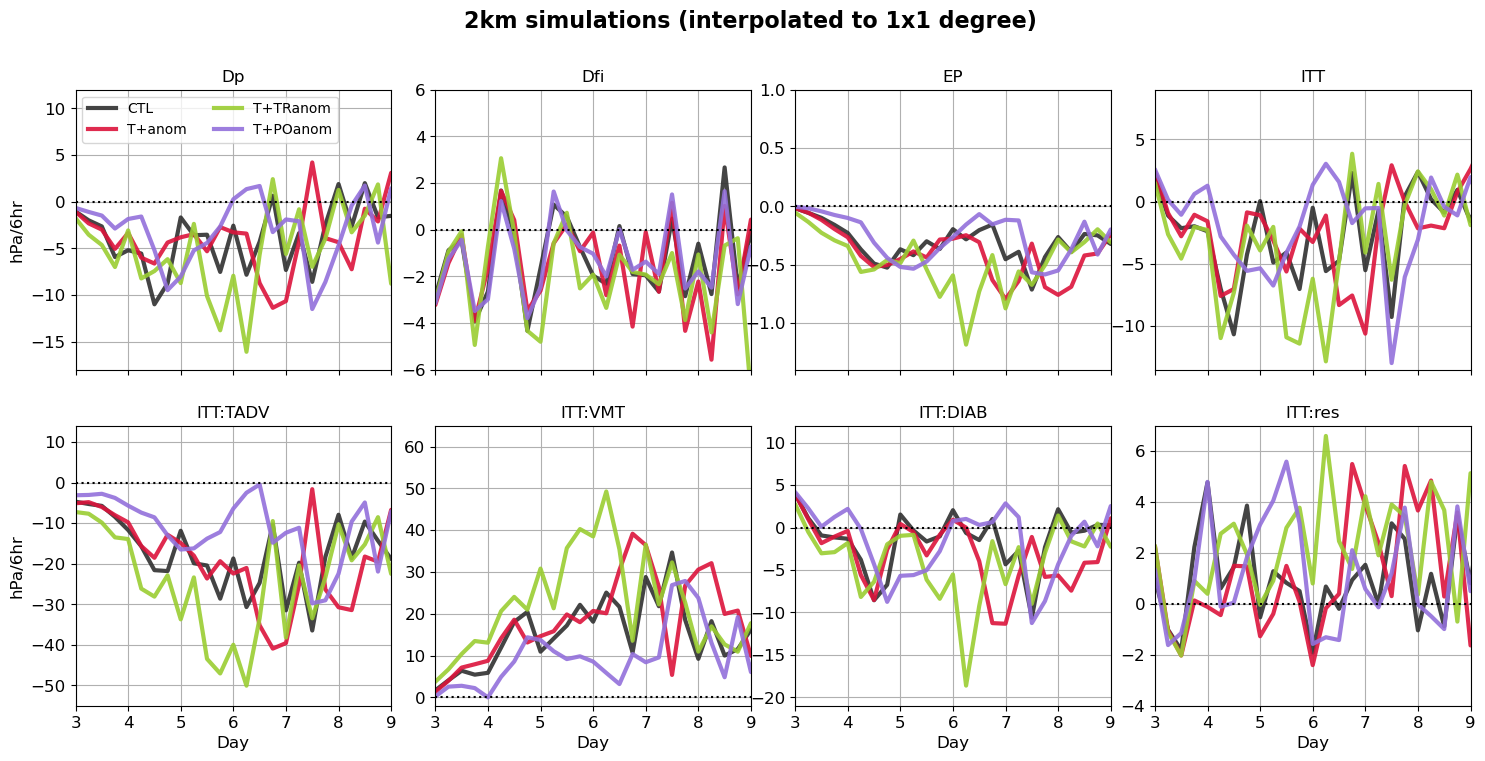

In [16]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
#colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
term = 'All'

fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in [1,4,5,6]: # loop over simulations
    ax[0,0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,3].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,2].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    
ax[0,0].set_title('Dp')
ax[0,1].set_title('Dfi')
ax[0,2].set_title('EP')
ax[0,3].set_title('ITT')
ax[1,0].set_title('ITT:TADV')
ax[1,1].set_title('ITT:VMT')
ax[1,2].set_title('ITT:DIAB')
ax[1,3].set_title('ITT:res')


ax[0,0].set_ylim((-18, 12))
ax[0,1].set_ylim((-6, 6))
ax[0,2].set_ylim((-1.4, 1))
ax[0,3].set_ylim((-13.5, 9))
ax[1,0].set_ylim(-55, 14)
ax[1,1].set_ylim(-2, 65)
ax[1,2].set_ylim(-21, 12)
ax[1,3].set_ylim(-4, 7)

ax[1,0].set_xlabel('Day', fontsize=12)
ax[1,1].set_xlabel('Day', fontsize=12)
ax[1,2].set_xlabel('Day', fontsize=12)
ax[1,3].set_xlabel('Day', fontsize=12)

ax[0,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0,0].set_xlim((3, 9))
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k')
ax[0,1].axhline(y=0,linestyle=':', color='k')
ax[0,2].axhline(y=0,linestyle=':', color='k')
ax[0,3].axhline(y=0,linestyle=':', color='k')
ax[1,0].axhline(y=0,linestyle=':', color='k')
ax[1,1].axhline(y=0,linestyle=':', color='k')
ax[1,2].axhline(y=0,linestyle=':', color='k')
ax[1,3].axhline(y=0,linestyle=':', color='k')
ax[0,0].legend(ncol=2, loc='upper left')
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.14)
fig.suptitle(''+res+' simulations (interpolated to 1x1 degree)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('CyclonePTEtimeseries_Sim1456_'+res+'_Allterms_in_onefig.png',
#               bbox_inches='tight',dpi=100)
plt.show()



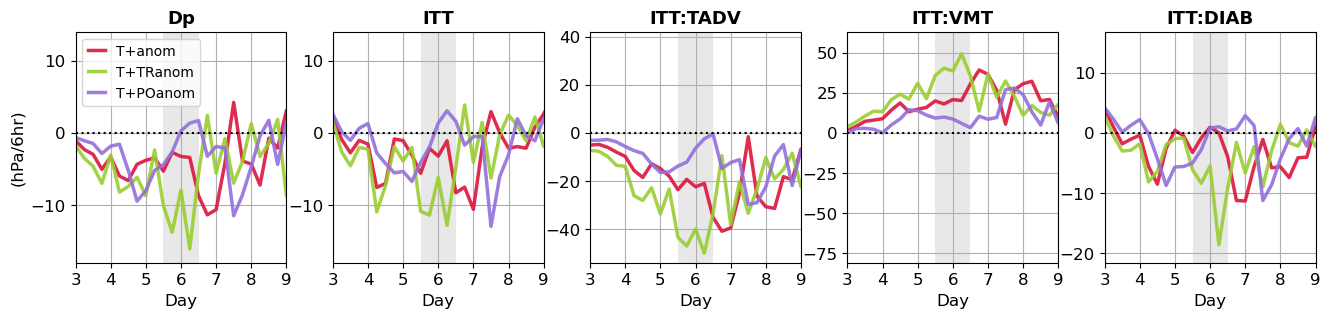

In [71]:
# Separating the two equations #
from matplotlib.patches import Rectangle
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
#colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}
colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
term = 'All'

fig, ax = plt.subplots(1, 5, figsize=(16,3), sharex=True, sharey=False)
for i in [4,5,6]: # loop over simulations
    
    if i == 5:
        lw=2.5
    else:
        lw=2.5
        
   
    ax[0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
               linewidth=lw, label=expname[i], alpha=0.9)
   # ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
   #            linewidth=3, label=expname[i], alpha=0.9)
   # ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
   #            linewidth=3, label=expname[i], alpha=0.9)
    ax[1].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
               linewidth=lw, label=expname[i], alpha=0.9)
    ax[2].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
               linewidth=lw, label=expname[i], alpha=0.9)
    ax[3].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=lw, label=expname[i], alpha=0.9)
    ax[4].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
               linewidth=lw, label=expname[i], alpha=0.9)
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3, label=expname[i], alpha=0.9)
    
    ax[0].add_patch(Rectangle((5.5,-18),1,32,facecolor=f'0.91', alpha=0.7))
    ax[1].add_patch(Rectangle((5.5,-18),1,32,facecolor=f'0.91', alpha=0.7))
    ax[2].add_patch(Rectangle((5.5,-54),1,96,facecolor=f'0.91', alpha=0.7))
    ax[3].add_patch(Rectangle((5.5,-81),1,144,facecolor=f'0.91', alpha=0.7))
    ax[4].add_patch(Rectangle((5.5,-21.6),1,53.6,facecolor=f'0.91', alpha=0.7))
    
ax[0].set_title('Dp', weight='bold',fontsize=13)
#ax[0,1].set_title('Dfi')
#ax[0,2].set_title('EP')
ax[1].set_title('ITT', weight='bold',fontsize=13)
ax[2].set_title('ITT:TADV', weight='bold',fontsize=13)
ax[3].set_title('ITT:VMT', weight='bold',fontsize=13)
ax[4].set_title('ITT:DIAB', weight='bold',fontsize=13)
#ax[1,3].set_title('ITT:res')


ax[0].set_ylim((-18, 14))
#ax[0,1].set_ylim((-6, 6))
#ax[0,2].set_ylim((-1.4, 1))
ax[1].set_ylim((-18, 14))
ax[2].set_ylim(-54, 42)
ax[3].set_ylim(-81,63)
ax[4].set_ylim(-21.6,16.8)
#x[4].set_ylim((-18, 14))

ax[0].set_xlabel('Day', fontsize=12)
ax[1].set_xlabel('Day', fontsize=12)
ax[2].set_xlabel('Day', fontsize=12)
ax[3].set_xlabel('Day', fontsize=12)
ax[4].set_xlabel('Day', fontsize=12)

ax[0].set_ylabel('(hPa/'+str(dt)+'hr)', fontsize=12)
#ax[1,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[2].yaxis.grid()
ax[3].yaxis.grid()
ax[4].yaxis.grid()

ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[2].xaxis.grid()
ax[3].xaxis.grid()
ax[4].xaxis.grid()

ax[0].set_xticks([3,4,5,6,7,8,9],[3,4,5,6,7,8,9])
ax[1].set_xticks([3,4,5,6,7,8,9],[3,4,5,6,7,8,9])
ax[2].set_xticks([3,4,5,6,7,8,9],[3,4,5,6,7,8,9])
ax[3].set_xticks([3,4,5,6,7,8,9],[3,4,5,6,7,8,9])
ax[4].set_xticks([3,4,5,6,7,8,9],[3,4,5,6,7,8,9])

ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[2].axhline(y=0,linestyle=':', color='k')
ax[3].axhline(y=0,linestyle=':', color='k')
ax[4].axhline(y=0,linestyle=':', color='k')

ax[0].legend(ncol=1, loc='upper left', fontsize=10,handlelength=1.2)
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[3].tick_params(axis='both', which='major', labelsize=12)
ax[4].tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(wspace = 0.22)
#fig.suptitle(''+res+' simulations (interpolated to 1x1 degree)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('FigR3_Sim1456_'+res+'_Allterms_in_onefig.png',
               bbox_inches='tight',dpi=100)
plt.show()



#### 